<a href="https://colab.research.google.com/github/eaglefire7/AluraStoreDS/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento


In [20]:
import requests
import csv
from io import StringIO # To treat string data as a file

# List of URLs for each store
store_urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# ---
# Function to calculate store revenue without Pandas
# ---
def calculate_store_revenue_pure_python(url, store_name):
    """
    Calculates the total revenue for a given store URL using pure Python.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {store_name} from {url}: {e}")
        return 0.0

    csv_data = StringIO(response.text) # Treat the string content as a file

    # Define a list of possible column names for sales/revenue
    possible_sales_columns = ['Valor_Venda', 'Vendas', 'Valor', 'Sales', 'Revenue', 'Preco_Venda', 'Preço']

    total_revenue = 0.0
    sales_column_index = -1 # Initialize with an invalid index

    # Use csv.reader to handle CSV parsing
    reader = csv.reader(csv_data)

    try:
        headers = next(reader) # Get the header row
    except StopIteration:
        print(f"Warning: {store_name} CSV is empty.")
        return 0.0

    # Find the index of the sales column
    for i, header in enumerate(headers):
        if header in possible_sales_columns:
            sales_column_index = i
            break

    if sales_column_index == -1:
        print(f"Warning: Could not find a sales column for {store_name}. Headers found: {headers}")
        return 0.0

    # Iterate over the remaining rows (data rows)
    for row in reader:
        if len(row) > sales_column_index: # Ensure the row has enough columns
            try:
                # Attempt to convert the sales value to a float and add to total
                value = float(row[sales_column_index])
                total_revenue += value
            except ValueError:
                # Handle cases where the sales value might not be a valid number
                # print(f"Skipping non-numeric value in {store_name}: {row[sales_column_index]}")
                pass # Just skip this value if it's not a number
            except IndexError:
                # Handle cases where a row might be malformed (fewer columns than expected)
                # print(f"Skipping malformed row in {store_name}: {row}")
                pass


    return total_revenue

# ---
# Process each store and calculate revenue
# ---
store_revenues = {}
total_revenue_overall = 0.0 # Renamed to avoid conflict with function variable

print("Calculating revenues for each store (Pure Python)...")
for name, url in store_urls.items():
    revenue = calculate_store_revenue_pure_python(url, name)
    store_revenues[name] = revenue
    total_revenue_overall += revenue
    print(f"{name} Faturamento: R${revenue:,.2f}")

print("\n---")
print(f"Faturamento Total de Todas as Lojas (Pure Python): R${total_revenue_overall:,.2f}")
print("---")

Calculating revenues for each store (Pure Python)...
Loja 1 Faturamento: R$1,534,509.12
Loja 2 Faturamento: R$1,488,459.06
Loja 3 Faturamento: R$1,464,025.03
Loja 4 Faturamento: R$1,384,497.58

---
Faturamento Total de Todas as Lojas (Pure Python): R$5,871,490.79
---


In [21]:
import pandas as pd

# List of URLs for each store
store_urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# ---
# Function to calculate store revenue
# ---
def calculate_store_revenue(df, store_name):
    """
    Calculates the total revenue for a given store DataFrame.
    It tries to identify the sales column based on common names.
    """
    # Define a list of possible column names for sales/revenue
    possible_sales_columns = ['Valor_Venda', 'Vendas', 'Valor', 'Sales', 'Revenue', 'Preco_Venda', 'Preço']

    sales_column = None
    for col in possible_sales_columns:
        if col in df.columns:
            sales_column = col
            break

    if sales_column is None:
        print(f"Warning: Could not find a sales column for {store_name}. Columns found: {df.columns.tolist()}")
        return 0.0 # Return 0 if no sales column is found

    # Ensure the sales column is numeric
    # Using errors='coerce' will turn non-numeric values into NaN
    df[sales_column] = pd.to_numeric(df[sales_column], errors='coerce')
    # Drop rows where the sales value became NaN after conversion
    df.dropna(subset=[sales_column], inplace=True)

    return df[sales_column].sum()

# ---
# Process each store and calculate revenue
# ---
store_revenues = {}
total_revenue = 0.0

print("Calculating revenues for each store...")
for name, url in store_urls.items():
    try:
        df = pd.read_csv(url)
        revenue = calculate_store_revenue(df, name)
        store_revenues[name] = revenue
        total_revenue += revenue
        print(f"{name} Faturamento: R${revenue:,.2f}")
    except Exception as e:
        print(f"Error processing {name} from {url}: {e}")
        store_revenues[name] = 0.0 # Assign 0 if there's an error

print("\n---")
print(f"Faturamento Total de Todas as Lojas: R${total_revenue:,.2f}")
print("---")

Calculating revenues for each store...
Loja 1 Faturamento: R$1,534,509.12
Loja 2 Faturamento: R$1,488,459.06
Loja 3 Faturamento: R$1,464,025.03
Loja 4 Faturamento: R$1,384,497.58

---
Faturamento Total de Todas as Lojas: R$5,871,490.79
---


# 2. Vendas por Categoria


In [7]:
import urllib.request
import csv
from io import StringIO

# URLs para cada loja
urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

def ler_csv_manual(url):
    dados = []
    try:
        with urllib.request.urlopen(url) as resposta:
            linhas = resposta.read().decode('utf-8').splitlines()
            # Usar DictReader para ler o CSV como dicionários
            leitor = csv.DictReader(StringIO(linhas[0] + '\n' + '\n'.join(linhas[1:])))
            for linha in leitor:
                # Remove espaços em branco das chaves do dicionário (nomes das colunas)
                cleaned_linha = {k.strip(): v for k, v in linha.items()}
                dados.append(cleaned_linha)
    except Exception as e:
        print(f"Erro ao ler CSV de {url}: {e}")
    return dados

# Dicionário para armazenar as vendas por categoria (total de todas as lojas)
vendas_por_categoria_total = {}
total_faturamento_geral = 0.0 # Novo: Acumulador para o faturamento total geral

print("Iniciando análise de vendas por categoria e faturamento geral (Python Puro corrigido)...\n")

# Processar todas as lojas
for i, (nome_loja, url) in enumerate(urls.items()):
    print(f"\n--- Vendas por categoria na {nome_loja} ---")
    dados_loja = ler_csv_manual(url)

    if not dados_loja:
        print(f"Não há dados para {nome_loja}. Pulando.")
        continue

    categorias_loja = {}
    faturamento_loja_atual = 0.0 # Novo: Acumulador para o faturamento total da loja atual

    # Verificação de colunas esperadas (para depuração)
    primeira_linha = dados_loja[0]
    required_cols = ['Categoria do Produto', 'Preço', 'Quantidade de parcelas']
    missing_cols = [col for col in required_cols if col not in primeira_linha]

    if missing_cols:
        print(f"ATENÇÃO: Colunas necessárias ausentes em {nome_loja}: {missing_cols}. Colunas disponíveis: {list(primeira_linha.keys())}. Pulando.")
        continue

    for venda in dados_loja:
        categoria = venda.get('Categoria do Produto')
        preco_str = venda.get('Preço')
        quantidade_parcelas_str = venda.get('Quantidade de parcelas')

        if categoria is None or preco_str is None or quantidade_parcelas_str is None:
            continue

        try:
            # Correção de vírgula para ponto se necessário
            preco = float(preco_str.replace(',', '.'))
            quantidade_parcelas = int(quantidade_parcelas_str.replace(',', '.')) # Também pode ter vírgula

            # REPLICANDO O CÁLCULO DA SUA IMAGEM: Preço * Quantidade de Parcelas
            valor_venda = preco * quantidade_parcelas

        except ValueError:
            continue

        categorias_loja[categoria] = categorias_loja.get(categoria, 0.0) + valor_venda
        faturamento_loja_atual += valor_venda # Acumula para o total da loja
        vendas_por_categoria_total[categoria] = vendas_por_categoria_total.get(categoria, 0.0) + valor_venda

    # Exibir resultados da loja atual
    print(f"Faturamento Total de {nome_loja}: R${faturamento_loja_atual:,.2f}") # Exibe o total da loja

    if categorias_loja:
        sorted_categorias_loja = sorted(categorias_loja.items(), key=lambda item: item[1], reverse=True)
        for cat, val in sorted_categorias_loja:
            print(f"{cat}: R${val:,.2f}")
    else:
        print(f"Nenhum dado de vendas válido para {nome_loja} após o processamento.")


print("\n" + "="*50)
print("--- FATURAMENTO TOTAL GERAL DE TODAS AS LOJAS ---")
print("="*50)

# O total_faturamento_geral já foi acumulado no loop anterior
# Para o Python Puro, a forma mais simples de ter o "Total Geral" é somar todos os valores do dicionário de categorias totais
total_faturamento_geral_calculado = sum(vendas_por_categoria_total.values())

if total_faturamento_geral_calculado > 0:
    print(f"Faturamento Total Geral: R${total_faturamento_geral_calculado:,.2f}")
else:
    print("Nenhum dado de vendas válido encontrado para o faturamento total geral.")

print("\n--- Vendas Totais por Categoria (Todas as Lojas - Python Puro) ---")
if vendas_por_categoria_total:
    sorted_vendas_totais = sorted(vendas_por_categoria_total.items(), key=lambda item: item[1], reverse=True)
    for cat, val in sorted_vendas_totais:
        print(f"{cat}: R${val:,.2f}")
else:
    print("Nenhum dado de vendas válido encontrado para o total de lojas por categoria.")

print("\nAnálise completa finalizada (Python Puro).")

Iniciando análise de vendas por categoria e faturamento geral (Python Puro corrigido)...


--- Vendas por categoria na Loja 1 ---
Faturamento Total de Loja 1: R$4,563,636.11
eletronicos: R$1,720,525.18
eletrodomesticos: R$1,376,501.27
moveis: R$777,243.14
instrumentos musicais: R$369,322.34
esporte e lazer: R$169,179.18
brinquedos: R$65,412.04
utilidades domesticas: R$51,092.72
livros: R$34,360.24

--- Vendas por categoria na Loja 2 ---
Faturamento Total de Loja 2: R$4,449,584.18
eletronicos: R$1,715,519.72
eletrodomesticos: R$1,368,304.66
moveis: R$703,108.03
instrumentos musicais: R$392,599.48
esporte e lazer: R$108,879.57
brinquedos: R$62,300.37
utilidades domesticas: R$56,984.93
livros: R$41,887.42

--- Vendas por categoria na Loja 3 ---
Faturamento Total de Loja 3: R$4,325,091.42
eletronicos: R$1,468,443.69
eletrodomesticos: R$1,441,845.38
moveis: R$740,123.50
instrumentos musicais: R$333,781.40
esporte e lazer: R$164,527.29
brinquedos: R$81,591.72
utilidades domesticas: R$59,635.

In [1]:
import pandas as pd

# URLs para cada loja
store_urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# Nomes de colunas esperados (baseados na sua saída anterior)
SALES_COLUMN = 'Preço'
CATEGORY_COLUMN = 'Categoria do Produto'

# Lista para armazenar todos os DataFrames carregados (para a análise total e faturamento geral)
all_dfs = []

print("Iniciando a análise de vendas por categoria e faturamento geral...\n")

# --- Análise por Loja Individual ---
print("--- Vendas por Categoria por Loja Individual ---")
for store_name, url in store_urls.items():
    print(f"\n--- Processando {store_name} ---")
    try:
        df = pd.read_csv(url)

        # Limpar espaços em branco nos nomes das colunas
        df.columns = df.columns.str.strip()

        # Antes de adicionar ao all_dfs, vamos fazer uma cópia e garantir que as colunas chave
        # que serão unidas estejam em um formato consistente (string), para que o concat não infira errado.
        df_for_concat = df.copy()
        for col_name in [SALES_COLUMN, 'Quantidade de parcelas', CATEGORY_COLUMN]:
            if col_name in df_for_concat.columns:
                df_for_concat[col_name] = df_for_concat[col_name].astype(str) # Força para string antes de concatenar

        all_dfs.append(df_for_concat) # Adiciona o DF (com colunas chave como string) à lista para análise total


        # Verificar se as colunas essenciais existem no DataFrame atual para a análise individual
        # (Usaremos 'df' aqui, que é o original lido, para não afetar o 'df_for_concat')
        if SALES_COLUMN not in df.columns:
            print(f"Erro: Coluna de vendas '{SALES_COLUMN}' não encontrada em {store_name}. Colunas: {df.columns.tolist()}")
            continue
        # A coluna de categoria pode não existir em algumas lojas, mas podemos continuar com o faturamento total da loja
        category_col_present_in_store = CATEGORY_COLUMN in df.columns


        # Limpeza e conversão de dados para a análise desta loja específica
        # (Vamos usar 'df' diretamente aqui e fazer as conversões com segurança)
        df_clean_local = df.copy() # Criar uma cópia para a análise local

        # Primeiro, lidar com a coluna 'Quantidade de parcelas' e 'Preço'
        # Converter para string ANTES de usar .str.replace, caso já tenha sido inferida como numérico
        if 'Quantidade de parcelas' in df_clean_local.columns:
            df_clean_local['Quantidade de parcelas'] = df_clean_local['Quantidade de parcelas'].astype(str).str.replace(',', '.', regex=False)
            df_clean_local['Quantidade de parcelas'] = pd.to_numeric(df_clean_local['Quantidade de parcelas'], errors='coerce')
        else:
            # Se 'Quantidade de parcelas' não existe, criamos uma coluna com valor 1 para multiplicação (se 'Preço' for unitário)
            # OU definimos uma estratégia para quando ela não existe.
            # Para replicar sua foto, vamos assumir que o faturamento é sempre 'Preço' * 'Quantidade de parcelas'
            # Se não houver 'Quantidade de parcelas', não podemos replicar a foto.
            print(f"Atenção: Coluna 'Quantidade de parcelas' não encontrada em {store_name}. O cálculo de faturamento será baseado apenas em '{SALES_COLUMN}'.")
            df_clean_local['Quantidade de parcelas'] = 1 # Define como 1 para multiplicação por Preço * 1


        df_clean_local[SALES_COLUMN] = df_clean_local[SALES_COLUMN].astype(str).str.replace(',', '.', regex=False)
        df_clean_local[SALES_COLUMN] = pd.to_numeric(df_clean_local[SALES_COLUMN], errors='coerce')


        # Cálculo do valor_venda incluindo 'Quantidade de parcelas'
        df_clean_local['Valor_Calculado_Venda'] = df_clean_local[SALES_COLUMN] * df_clean_local['Quantidade de parcelas']

        # Dropna considerando o valor calculado para a soma e a categoria (se presente)
        subset_cols_dropna_local = ['Valor_Calculado_Venda']
        if category_col_present_in_store:
            subset_cols_dropna_local.append(CATEGORY_COLUMN)
            df_clean_local[CATEGORY_COLUMN] = df_clean_local[CATEGORY_COLUMN].astype(str) # Garante que a coluna de categoria é string

        df_clean_local.dropna(subset=subset_cols_dropna_local, inplace=True)

        # --- Faturamento Total da Loja Individual ---
        faturamento_loja_atual = df_clean_local['Valor_Calculado_Venda'].sum()
        print(f"Faturamento Total de {store_name}: R${faturamento_loja_atual:,.2f}")


        # Agrupar por categoria e somar as vendas (se a coluna de categoria existir)
        if category_col_present_in_store:
            sales_by_category = df_clean_local.groupby(CATEGORY_COLUMN)['Valor_Calculado_Venda'].sum()
            sales_by_category_sorted = sales_by_category.sort_values(ascending=False)

            # Exibir os resultados por categoria
            if not sales_by_category_sorted.empty:
                print(f"Vendas por Categoria na {store_name}:")
                print(sales_by_category_sorted.apply(lambda x: f"R${x:,.2f}"))
            else:
                print(f"Não há dados de vendas válidos por categoria para {store_name} após a limpeza.")
        else:
            print(f"Não foi possível analisar vendas por categoria para {store_name} (coluna de categoria ausente no arquivo original).")

        print("-" * 30 + "\n")

    except Exception as e:
        print(f"Erro inesperado ao processar {store_name} da URL {url}: {e}")
        print("-" * 30 + "\n")

# --- Análise Total (Todas as Lojas Consolidadas) ---
print("\n" + "="*50)
print("--- Vendas Totais por Categoria (Todas as Lojas) ---")
print("="*50)

total_faturamento_geral = 0.0 # Inicializa o acumulador do faturamento geral

if not all_dfs:
    print("Nenhum dado de loja foi carregado para a análise total.")
else:
    # Concatenar todos os DataFrames carregados com sucesso
    combined_df = pd.concat(all_dfs, ignore_index=True)

    # Limpar espaços em branco nos nomes das colunas do DataFrame combinado (segurança)
    combined_df.columns = combined_df.columns.str.strip()

    # --- Cálculo para o Faturamento Total Geral ---
    # Lidar com a conversão de tipo novamente para o DataFrame combinado

    # Coluna 'Quantidade de parcelas'
    if 'Quantidade de parcelas' in combined_df.columns:
        # Força para string antes do replace, então para numérico
        combined_df['Quantidade de parcelas'] = combined_df['Quantidade de parcelas'].astype(str).str.replace(',', '.', regex=False)
        combined_df['Quantidade de parcelas'] = pd.to_numeric(combined_df['Quantidade de parcelas'], errors='coerce')
    else:
        print("Atenção: Coluna 'Quantidade de parcelas' não encontrada no conjunto de dados total. O cálculo de faturamento será baseado apenas em 'Preço'.")
        combined_df['Quantidade de parcelas'] = 1 # Define como 1 para multiplicação por Preço * 1

    # Coluna 'Preço'
    combined_df[SALES_COLUMN] = combined_df[SALES_COLUMN].astype(str).str.replace(',', '.', regex=False)
    combined_df[SALES_COLUMN] = pd.to_numeric(combined_df[SALES_COLUMN], errors='coerce')

    # Calcula o Valor_Calculado_Venda
    combined_df['Valor_Calculado_Venda'] = combined_df[SALES_COLUMN] * combined_df['Quantidade de parcelas']

    # Remover NaNs para o cálculo total
    combined_df.dropna(subset=['Valor_Calculado_Venda'], inplace=True)
    total_faturamento_geral = combined_df['Valor_Calculado_Venda'].sum()
    print(f"\n--- FATURAMENTO TOTAL GERAL DE TODAS AS LOJAS: R${total_faturamento_geral:,.2f} ---")


    # --- Análise por Categoria Total (se a coluna de categoria existir) ---
    if CATEGORY_COLUMN in combined_df.columns:
        combined_df.dropna(subset=[CATEGORY_COLUMN], inplace=True) # Garantir que a categoria não é NaN
        combined_df[CATEGORY_COLUMN] = combined_df[CATEGORY_COLUMN].astype(str)

        total_sales_by_category = combined_df.groupby(CATEGORY_COLUMN)['Valor_Calculado_Venda'].sum()
        total_sales_by_category_sorted = total_sales_by_category.sort_values(ascending=False)

        if not total_sales_by_category_sorted.empty:
            print("\nVendas por Categoria (Consolidado de Todas as Lojas):")
            print(total_sales_by_category_sorted.apply(lambda x: f"R${x:,.2f}"))
        else:
            print("Não há dados de vendas válidos por categoria no conjunto de dados total após a limpeza.")
    else:
        print("Não foi possível analisar vendas por categoria para o total de lojas (coluna de categoria ausente).")

print("\nAnálise completa finalizada!")

Iniciando a análise de vendas por categoria e faturamento geral...

--- Vendas por Categoria por Loja Individual ---

--- Processando Loja 1 ---
Faturamento Total de Loja 1: R$4,563,636.11
Vendas por Categoria na Loja 1:
Categoria do Produto
eletronicos              R$1,720,525.18
eletrodomesticos         R$1,376,501.27
moveis                     R$777,243.14
instrumentos musicais      R$369,322.34
esporte e lazer            R$169,179.18
brinquedos                  R$65,412.04
utilidades domesticas       R$51,092.72
livros                      R$34,360.24
Name: Valor_Calculado_Venda, dtype: object
------------------------------


--- Processando Loja 2 ---
Faturamento Total de Loja 2: R$4,449,584.18
Vendas por Categoria na Loja 2:
Categoria do Produto
eletronicos              R$1,715,519.72
eletrodomesticos         R$1,368,304.66
moveis                     R$703,108.03
instrumentos musicais      R$392,599.48
esporte e lazer            R$108,879.57
brinquedos                  R$62,300.3

# 3. Média de Avaliação das Lojas




In [3]:
import pandas as pd

# URLs para cada loja
store_urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# Nome da coluna de avaliação esperado
RATING_COLUMN = 'Avaliação da compra'

print("Iniciando a análise da média de avaliação por loja...\n")

# Dicionário para armazenar as médias de avaliação de cada loja
store_average_ratings = {}

for store_name, url in store_urls.items():
    print(f"--- Processando {store_name} ---")
    try:
        df = pd.read_csv(url)

        # Limpar espaços em branco nos nomes das colunas
        df.columns = df.columns.str.strip()

        # Verificar se a coluna de avaliação existe
        if RATING_COLUMN not in df.columns:
            print(f"Erro: Coluna de avaliação '{RATING_COLUMN}' não encontrada em {store_name}. Colunas disponíveis: {df.columns.tolist()}")
            store_average_ratings[store_name] = "N/A" # Não aplicável
            print("-" * 30 + "\n")
            continue

        # Converter a coluna de avaliação para numérica, lidando com erros e vírgulas
        df[RATING_COLUMN] = df[RATING_COLUMN].astype(str).str.replace(',', '.', regex=False)
        df[RATING_COLUMN] = pd.to_numeric(df[RATING_COLUMN], errors='coerce')

        # Remover linhas com valores NaN na coluna de avaliação após a conversão
        df.dropna(subset=[RATING_COLUMN], inplace=True)

        # Calcular a média
        if not df[RATING_COLUMN].empty:
            average_rating = df[RATING_COLUMN].mean()
            store_average_ratings[store_name] = average_rating
            print(f"Média de Avaliação em {store_name}: {average_rating:.2f}")
        else:
            store_average_ratings[store_name] = "Sem dados válidos"
            print(f"Não há dados de avaliação válidos para {store_name} após a limpeza.")

        print("-" * 30 + "\n")

    except Exception as e:
        print(f"Erro inesperado ao processar {store_name} da URL {url}: {e}")
        store_average_ratings[store_name] = "Erro no processamento"
        print("-" * 30 + "\n")

print("\n" + "="*50)
print("--- MÉDIAS DE AVALIAÇÃO POR LOJA ---")
print("="*50)

# Exibir um resumo final
for store, avg_rating in store_average_ratings.items():
    if isinstance(avg_rating, float):
        print(f"{store}: {avg_rating:.2f}")
    else:
        print(f"{store}: {avg_rating}")

print("\nAnálise de média de avaliação concluída!")

Iniciando a análise da média de avaliação por loja...

--- Processando Loja 1 ---
Média de Avaliação em Loja 1: 3.98
------------------------------

--- Processando Loja 2 ---
Média de Avaliação em Loja 2: 4.04
------------------------------

--- Processando Loja 3 ---
Média de Avaliação em Loja 3: 4.05
------------------------------

--- Processando Loja 4 ---
Média de Avaliação em Loja 4: 4.00
------------------------------


--- MÉDIAS DE AVALIAÇÃO POR LOJA ---
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00

Análise de média de avaliação concluída!


In [4]:
import requests
import csv
from io import StringIO

# URLs para cada loja
store_urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# Nome da coluna de avaliação esperado
RATING_COLUMN = 'Avaliação da compra'

def calculate_average_rating_pure_python(url, store_name):
    """
    Calcula a média de avaliação para uma dada URL de loja usando Python puro.
    """
    ratings = []

    try:
        response = requests.get(url)
        response.raise_for_status() # Lança um HTTPError para respostas de erro (4xx ou 5xx)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao buscar dados para {store_name} de {url}: {e}")
        return None # Retorna None para indicar erro

    csv_data = StringIO(response.text)

    # Usar DictReader para acessar as colunas por nome
    reader = csv.DictReader(csv_data)

    # Limpar espaços em branco dos nomes das colunas (chaves do dicionário)
    # Isso é feito modificando reader.fieldnames
    if reader.fieldnames: # Verifica se há cabeçalhos
        reader.fieldnames = [field.strip() for field in reader.fieldnames]

    # Verificar se a coluna de avaliação existe após a limpeza dos nomes
    if RATING_COLUMN not in reader.fieldnames:
        print(f"Erro: Coluna de avaliação '{RATING_COLUMN}' não encontrada em {store_name}. Colunas disponíveis: {reader.fieldnames}")
        return "N/A" # Não aplicável

    for row in reader:
        rating_str = row.get(RATING_COLUMN) # Usa .get() para evitar KeyError

        if rating_str is None:
            continue # Pula se o valor da avaliação estiver faltando

        try:
            # Substituir vírgula por ponto e converter para float
            rating = float(rating_str.replace(',', '.'))
            ratings.append(rating)
        except ValueError:
            # print(f"Aviso: Valor de avaliação não numérico encontrado em {store_name}: '{rating_str}'. Pulando.")
            continue # Pula se não for um número válido

    if ratings:
        return sum(ratings) / len(ratings)
    else:
        return "Sem dados válidos" # Se não houver avaliações válidas após a filtragem

# ---
# Processar cada loja e calcular a média de avaliação
# ---
store_average_ratings = {}

print("Calculando a média de avaliação para cada loja (Python Puro)...\n")

for name, url in store_urls.items():
    print(f"--- Processando {name} ---")
    avg_rating = calculate_average_rating_pure_python(url, name)
    store_average_ratings[name] = avg_rating

    if isinstance(avg_rating, float):
        print(f"Média de Avaliação em {name}: {avg_rating:.2f}")
    else:
        print(f"Média de Avaliação em {name}: {avg_rating}")
    print("-" * 30 + "\n")

print("\n" + "="*50)
print("--- MÉDIAS DE AVALIAÇÃO POR LOJA (PYTHON PURO) ---")
print("="*50)

# Exibir um resumo final
for store, avg_rating in store_average_ratings.items():
    if isinstance(avg_rating, float):
        print(f"{store}: {avg_rating:.2f}")
    else:
        print(f"{store}: {avg_rating}")

print("\nAnálise de média de avaliação concluída (Python Puro)!")

Calculando a média de avaliação para cada loja (Python Puro)...

--- Processando Loja 1 ---
Média de Avaliação em Loja 1: 3.98
------------------------------

--- Processando Loja 2 ---
Média de Avaliação em Loja 2: 4.04
------------------------------

--- Processando Loja 3 ---
Média de Avaliação em Loja 3: 4.05
------------------------------

--- Processando Loja 4 ---
Média de Avaliação em Loja 4: 4.00
------------------------------


--- MÉDIAS DE AVALIAÇÃO POR LOJA (PYTHON PURO) ---
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00

Análise de média de avaliação concluída (Python Puro)!


# 4. Produtos Mais e Menos Vendidos

In [21]:
import pandas as pd

# URLs para cada loja (exemplo, você precisará definir 'urls' aqui se não estiver definido antes)
# Assumindo que 'urls' é um dicionário ou lista de URLs como nos exemplos anteriores
urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# Ler todos os CSVs e adicionar uma coluna 'Loja'
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls.values())], # Use .values() para iterar sobre as URLs
    ignore_index=True
)

# Limpar espaços em branco nos nomes das colunas
df_total.columns = df_total.columns.str.strip()

# Garantir os tipos corretos
# Tratar vírgulas e converter para numérico com errors='coerce' para lidar com inválidos
df_total['Preço'] = df_total['Preço'].astype(str).str.replace(',', '.', regex=False)
df_total['Preço'] = pd.to_numeric(df_total['Preço'], errors='coerce')

df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(str).str.replace(',', '.', regex=False)
df_total['Quantidade de parcelas'] = pd.to_numeric(df_total['Quantidade de parcelas'], errors='coerce')
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(float).astype('Int64') # Converte para Int64 para lidar com NaNs


# A receita é simplesmente o Preço (não multiplicamos pela quantidade de parcelas)
# Esta linha já desconsidera as parcelas, usando apenas o valor da coluna 'Preço'
df_total['Receita'] = df_total['Preço']

# Remover linhas com valores NaN nas colunas essenciais após a conversão
df_total.dropna(subset=['Produto', 'Receita', 'Loja'], inplace=True)

# Garantir que a coluna do produto é string
df_total['Produto'] = df_total['Produto'].astype(str)

# Agrupar por loja e Produto somando a receita
vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

# Função para mostrar os 3 produtos que mais e menos dinheiro geraram
def top_produtos(loja):
    dados = vendas[vendas['Loja'] == loja]

    if dados.empty:
        print(f"\n{loja} - Não há dados de vendas válidos para produtos nesta loja.")
        return

    top_mais_vendidos = dados.sort_values(by='Receita', ascending=False).head(3)
    top_menos_vendidos = dados.sort_values(by='Receita', ascending=True).head(3)

    print(f"\n{loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for _, linha in top_mais_vendidos.iterrows():
        print(f"{linha['Produto']} - Receita: R${linha['Receita']:.2f}")

    print(f"\n{loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    # Lógica para os 3 menos vendidos:
    # - Apenas se houver mais de 3 produtos distintos para evitar repetição do top mais vendido.
    if len(dados) > 3 and not top_menos_vendidos.equals(top_mais_vendidos):
        for _, linha in top_menos_vendidos.iterrows():
            print(f"{linha['Produto']} - Receita: R${linha['Receita']:.2f}")
    elif len(dados) > 0:
        print(f"Não há 3 produtos distintos para mostrar os menos vendidos (total de produtos: {len(dados)}).")
    else:
        print("Nenhum dado de vendas de produto encontrado.")


# Lista única de lojas
lojas_unicas = vendas['Loja'].unique()

# Mostrar resultados para cada loja
for loja in lojas_unicas:
    top_produtos(loja)


Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
TV Led UHD 4K - Receita: R$189534.28
Geladeira - Receita: R$149524.28
Celular Plus X42 - Receita: R$130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
Corda de pular - Receita: R$870.89
Dinossauro Rex - Receita: R$918.40
Cubo mágico 8x8 - Receita: R$929.27

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
Celular Plus X42 - Receita: R$150967.83
TV Led UHD 4K - Receita: R$137833.06
Geladeira - Receita: R$130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
Cubo mágico 8x8 - Receita: R$858.22
Dinossauro Rex - Receita: R$1027.41
Corda de pular - Receita: R$1142.54

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
Geladeira - Receita: R$133185.99
TV Led UHD 4K - Receita: R$128892.11
Celular Plus X42 - Receita: R$124300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
Cubo mágico 8x8 - Receita: R$853.81
Dinossauro Rex - Receita: R$1060.78
Corda de pular - Receita: R$1137.76

Loja 4 - TOP 3 produtos que MAIS

In [22]:
import requests
import csv
from io import StringIO
from collections import defaultdict

# URLs para cada loja
store_urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# Nomes de colunas esperados
PRODUCT_COLUMN = 'Produto'
PRICE_COLUMN = 'Preço'
# QUANTITY_COLUMN = 'Quantidade de parcelas' # Não será usada para o cálculo da Receita, conforme sua solicitação

def ler_csv(url):
    """
    Lê um arquivo CSV de uma URL, decodifica e retorna os dados como uma lista de dicionários.
    Trata espaços em branco nos nomes das colunas e vírgulas em números.
    """
    dados = []
    try:
        with requests.get(url, stream=True) as resposta:
            resposta.raise_for_status() # Lança um erro para status HTTP ruins (4xx ou 5xx)
            linhas = resposta.text.splitlines()

            csv_file = StringIO("\n".join(linhas))
            leitor = csv.DictReader(csv_file)

            if leitor.fieldnames:
                # Limpa espaços em branco dos nomes das colunas (cabeçalhos)
                leitor.fieldnames = [field.strip() for field in leitor.fieldnames]

            for linha in leitor:
                # Cria um novo dicionário com chaves limpas e valores tratados (removendo espaços)
                linha_limpa = {k: v.strip() if isinstance(v, str) else v for k, v in linha.items()}
                dados.append(linha_limpa)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao carregar CSV da URL {url}: {e}")
    except Exception as e:
        print(f"Erro inesperado ao processar CSV da URL {url}: {e}")
    return dados


# --- Análise de Produtos Mais e Menos Vendidos ---
def analisar_top_produtos_sem_parcelas(urls):
    print("\n--- Produtos Mais e Menos Vendidos (Receita = Preço, sem parcelas) ---")

    for store_name, url in urls.items():
        print(f"\n{store_name} - TOP 3 produtos que MAIS e MENOS dinheiro geraram:")
        dados_loja = ler_csv(url)
        ingreso_por_produto = defaultdict(float)

        if not dados_loja:
            print(f"Não foi possível carregar dados para {store_name}. Pulando...")
            print("-" * 50)
            continue

        # Verificar se as colunas necessárias existem
        # Usamos dados_loja[0] para pegar o primeiro item e verificar as chaves (cabeçalhos)
        if PRODUCT_COLUMN not in dados_loja[0] or PRICE_COLUMN not in dados_loja[0]:
            print(f"Colunas essenciais '{PRODUCT_COLUMN}' ou '{PRICE_COLUMN}' não encontradas em {store_name}. Pulando análise desta loja.")
            print("-" * 50)
            continue

        for venda in dados_loja:
            produto = venda.get(PRODUCT_COLUMN)
            preco_str = venda.get(PRICE_COLUMN)

            if produto is None or preco_str is None:
                continue # Pula a linha se dados essenciais estiverem faltando

            try:
                # Converte string para float, substituindo vírgula por ponto
                preco = float(preco_str.replace(',', '.'))

                # Lógica de faturamento: Receita é APENAS o Preço (sem considerar a quantidade de parcelas)
                ingreso_por_produto[produto] += preco

            except ValueError:
                # Ignora linhas com erros de conversão para não interromper a análise
                # print(f"Aviso: Erro de conversão em {store_name} para preço '{preco_str}'. Pulando linha.")
                continue

        # Converte para lista de tuplas (produto, receita) e ordena
        produtos_ordenados = sorted(ingreso_por_produto.items(), key=lambda x: x[1], reverse=True)

        if produtos_ordenados:
            top_mais_vendidos = produtos_ordenados[:3]

            print(f"\n{store_name} - TOP 3 produtos que MAIS dinheiro geraram:")
            for produto, receita in top_mais_vendidos:
                print(f"{produto} - Receita: R${receita:,.2f}")

            # Lógica para os 3 menos vendidos:
            # - Apenas se houver mais de 3 produtos distintos para evitar repetição do top mais vendido.
            # - Ou se houver produtos, mas não muitos, mostra todos que restam na ordem inversa.
            if len(produtos_ordenados) > 3:
                top_menos_vendidos = produtos_ordenados[-3:]
                print(f"\n{store_name} - TOP 3 produtos que MENOS dinheiro geraram:")
                for produto, receita in top_menos_vendidos:
                    print(f"{produto}: R${receita:,.2f}")
            elif len(produtos_ordenados) > 0: # Se houver 1 a 3 produtos, informa que não há 3 distintos
                 print(f"\n{store_name}: Não há 3 produtos distintos para mostrar os menos vendidos (total de produtos: {len(produtos_ordenados)}).")
            else: # Caso products_ordenados esteja vazio
                print(f"\n{store_name}: Nenhum dado de vendas de produto válido encontrado para análise.")
        else:
            print(f"Nenhum dado de vendas válido para {store_name} após o processamento.")

        print("-" * 50) # Separador visual

# --- Executar a análise ---
if __name__ == "__main__":
    analisar_top_produtos_sem_parcelas(store_urls)


--- Produtos Mais e Menos Vendidos (Receita = Preço, sem parcelas) ---

Loja 1 - TOP 3 produtos que MAIS e MENOS dinheiro geraram:

Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
TV Led UHD 4K - Receita: R$189,534.28
Geladeira - Receita: R$149,524.28
Celular Plus X42 - Receita: R$130,536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
Cubo mágico 8x8: R$929.27
Dinossauro Rex: R$918.40
Corda de pular: R$870.89
--------------------------------------------------

Loja 2 - TOP 3 produtos que MAIS e MENOS dinheiro geraram:

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
Celular Plus X42 - Receita: R$150,967.83
TV Led UHD 4K - Receita: R$137,833.06
Geladeira - Receita: R$130,176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
Corda de pular: R$1,142.54
Dinossauro Rex: R$1,027.41
Cubo mágico 8x8: R$858.22
--------------------------------------------------

Loja 3 - TOP 3 produtos que MAIS e MENOS dinheiro geraram:

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
Ge

# 5. Frete Médio por Loja


In [23]:
import requests
import csv
from io import StringIO
from collections import defaultdict

# URLs para cada loja
store_urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# Nome da coluna de Frete esperado
FRETE_COLUMN = 'Frete'

def ler_csv(url):
    """
    Lê um arquivo CSV de uma URL, decodifica e retorna os dados como uma lista de dicionários.
    Trata espaços em branco nos nomes das colunas.
    """
    dados = []
    try:
        with requests.get(url, stream=True) as resposta:
            resposta.raise_for_status() # Lança um erro para status HTTP ruins (4xx ou 5xx)
            linhas = resposta.text.splitlines()

            csv_file = StringIO("\n".join(linhas))
            leitor = csv.DictReader(csv_file)

            if leitor.fieldnames:
                # Limpa espaços em branco dos nomes das colunas (cabeçalhos)
                leitor.fieldnames = [field.strip() for field in leitor.fieldnames]

            for linha in leitor:
                # Cria um novo dicionário com chaves limpas e valores tratados (removendo espaços)
                linha_limpa = {k: v.strip() if isinstance(v, str) else v for k, v in linha.items()}
                dados.append(linha_limpa)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao carregar CSV da URL {url}: {e}")
    except Exception as e:
        print(f"Erro inesperado ao processar CSV da URL {url}: {e}")
    return dados


# --- Análise de Frete Médio por Loja ---
def analisar_frete_medio_por_loja(urls):
    print("\n--- Frete Médio por Loja ---")

    for store_name, url in urls.items():
        print(f"\nCalculando Frete Médio para {store_name}:")
        dados_loja = ler_csv(url)

        total_frete = 0.0
        contagem_frete = 0

        if not dados_loja:
            print(f"Não foi possível carregar dados para {store_name}. Pulando...")
            print("-" * 50)
            continue

        # Verificar se a coluna de Frete existe
        # Usamos dados_loja[0] para pegar o primeiro item e verificar as chaves (cabeçalhos)
        if FRETE_COLUMN not in dados_loja[0]:
            print(f"Coluna essencial '{FRETE_COLUMN}' não encontrada em {store_name}. Pulando análise desta loja.")
            print("-" * 50)
            continue

        for venda in dados_loja:
            frete_str = venda.get(FRETE_COLUMN)

            if frete_str is None or frete_str.strip() == '': # Verifica se o valor do frete está ausente ou vazio
                continue # Pula a linha se o frete estiver faltando ou vazio

            try:
                # Converte string para float, substituindo vírgula por ponto
                frete = float(frete_str.replace(',', '.'))

                total_frete += frete
                contagem_frete += 1

            except ValueError:
                # Ignora linhas com erros de conversão para não interromper a análise
                # print(f"Aviso: Erro de conversão em {store_name} para frete '{frete_str}'. Pulando linha.")
                continue

        if contagem_frete > 0:
            frete_medio = total_frete / contagem_frete
            print(f"Frete Médio em {store_name}: R${frete_medio:,.2f}")
        else:
            print(f"Nenhum dado de frete válido encontrado para {store_name}.")

        print("-" * 50) # Separador visual

# --- Executar a análise ---
if __name__ == "__main__":
    analisar_frete_medio_por_loja(store_urls)


--- Frete Médio por Loja ---

Calculando Frete Médio para Loja 1:
Frete Médio em Loja 1: R$34.69
--------------------------------------------------

Calculando Frete Médio para Loja 2:
Frete Médio em Loja 2: R$33.62
--------------------------------------------------

Calculando Frete Médio para Loja 3:
Frete Médio em Loja 3: R$33.07
--------------------------------------------------

Calculando Frete Médio para Loja 4:
Frete Médio em Loja 4: R$31.28
--------------------------------------------------


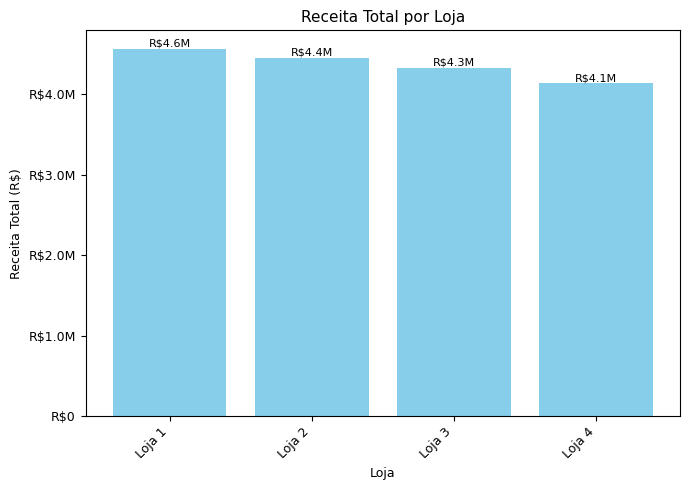

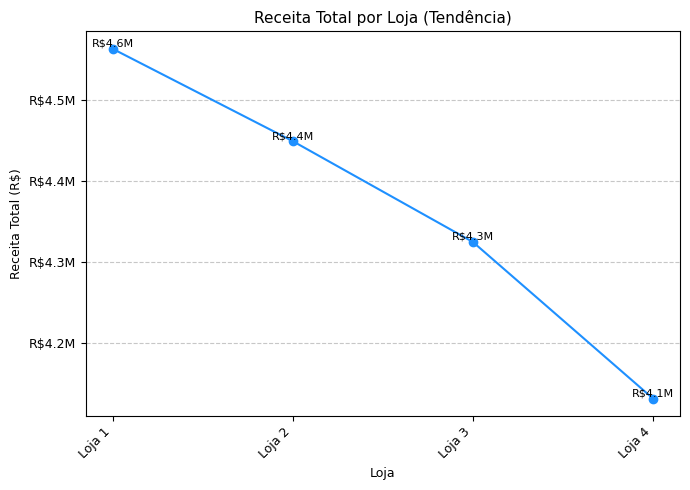

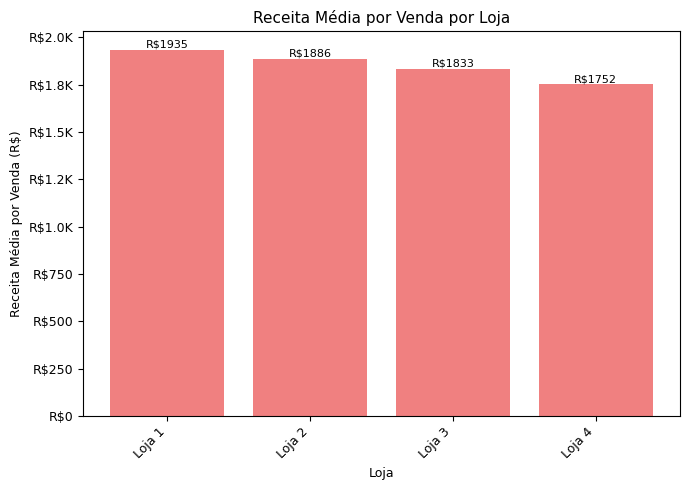

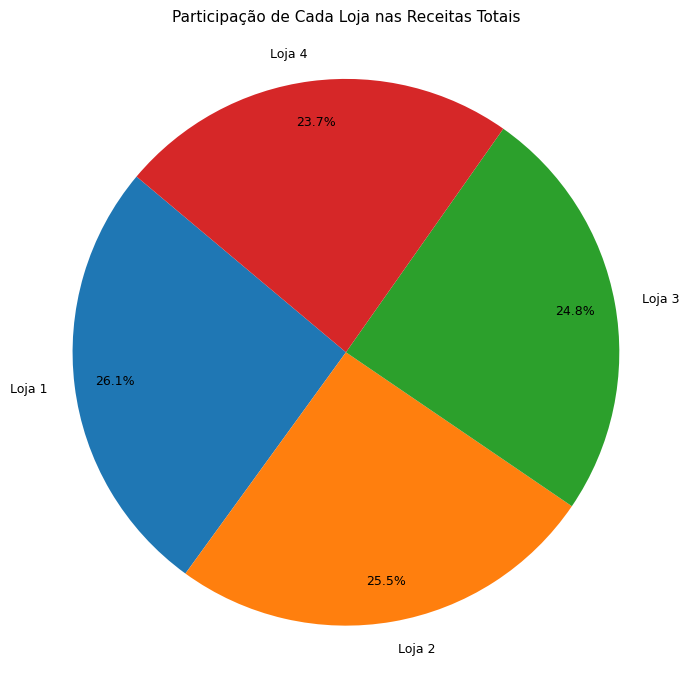

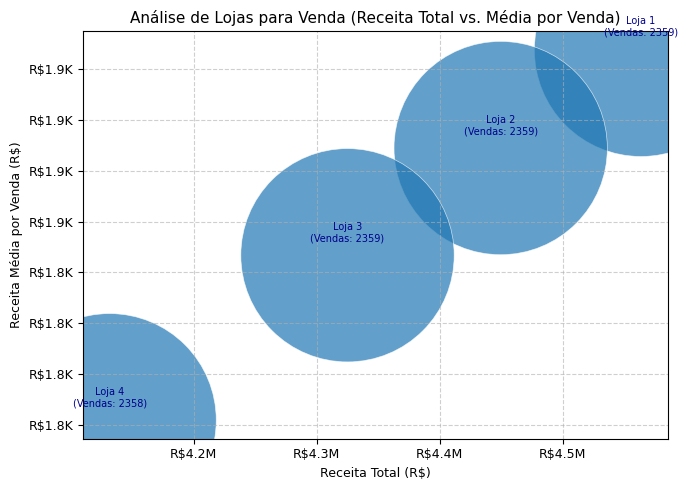


Gráficos gerados com sucesso!


In [25]:
import requests
import csv
from io import StringIO
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # Para formatar os valores no eixo Y

# URLs para cada loja
store_urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# Nomes de colunas esperados
PRICE_COLUMN = 'Preço'
QUANTITY_COLUMN = 'Quantidade de parcelas'

def ler_csv(url):
    """
    Lê um arquivo CSV de uma URL, decodifica e retorna os dados como uma lista de dicionários.
    Trata espaços em branco nos nomes das colunas.
    """
    dados = []
    try:
        with requests.get(url, stream=True) as resposta:
            resposta.raise_for_status()
            csv_file = StringIO(resposta.text)
            leitor = csv.DictReader(csv_file)
            if leitor.fieldnames:
                leitor.fieldnames = [field.strip() for field in leitor.fieldnames]
            for linha in leitor:
                linha_limpa = {k: v.strip() if isinstance(v, str) else v for k, v in linha.items()}
                dados.append(linha_limpa)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao carregar CSV da URL {url}: {e}")
    except Exception as e:
        print(f"Erro inesperado ao processar CSV da URL {url}: {e}")
    return dados

# --- Calcular Métricas por Loja ---
receita_por_loja = defaultdict(float)
vendas_por_loja = defaultdict(int)

for store_name, url in store_urls.items():
    dados_loja = ler_csv(url)
    if not dados_loja:
        continue

    # Verificar se as colunas essenciais existem antes de iterar
    if not all(col in dados_loja[0] for col in [PRICE_COLUMN, QUANTITY_COLUMN]):
        print(f"Colunas '{PRICE_COLUMN}' ou '{QUANTITY_COLUMN}' não encontradas em {store_name}. Pulando análise desta loja.")
        continue

    for venda in dados_loja:
        preco_str = venda.get(PRICE_COLUMN)
        quantidade_str = venda.get(QUANTITY_COLUMN)

        if preco_str and quantidade_str:
            try:
                preco = float(preco_str.replace(',', '.'))
                quantidade = int(float(quantidade_str.replace(',', '.')))
                receita = preco * quantidade # Cálculo de receita: Preço * Quantidade de parcelas
                receita_por_loja[store_name] += receita
                vendas_por_loja[store_name] += 1
            except ValueError:
                continue

lojas = list(receita_por_loja.keys())
receitas = list(receita_por_loja.values())
total_receita = sum(receitas)
participacao = [(r / total_receita) * 100 for r in receitas]
media_por_venda = {loja: receita_por_loja[loja] / vendas_por_loja[loja] if vendas_por_loja[loja] > 0 else 0
                   for loja in lojas}

# --- Configurações Comuns para os Gráficos ---
font_size_labels = 9
font_size_title = 11
figure_size = (7, 5) # Tamanho da figura (largura, altura)

# Formatador para o eixo Y em R$ (Milhões)
formatter_million = mticker.FormatStrFormatter('R$%.1fM') # Formata para R$X.XM
def format_currency(x, pos):
    if x >= 1_000_000:
        return f'R${x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'R${x/1_000:.1f}K'
    else:
        return f'R${x:.0f}'

# --- Gerar Gráficos ---

# 1. Receitas Totais por Loja (Gráfico de Barras)
plt.figure(figsize=figure_size)
bars = plt.bar(lojas, receitas, color='skyblue')
plt.xlabel('Loja', fontsize=font_size_labels)
plt.ylabel('Receita Total (R$)', fontsize=font_size_labels)
plt.title('Receita Total por Loja', fontsize=font_size_title)
plt.xticks(rotation=45, ha='right', fontsize=font_size_labels)
plt.yticks(fontsize=font_size_labels)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_currency)) # Aplica o formatador personalizado

# Adicionar valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'R${yval/1_000_000:.1f}M', ha='center', va='bottom', fontsize=8, color='black')
plt.tight_layout()
plt.show()


# 2. Receita Total por Loja (Gráfico de Linha)
plt.figure(figsize=figure_size)
plt.plot(lojas, receitas, marker='o', linestyle='-', color='dodgerblue')
plt.xlabel('Loja', fontsize=font_size_labels)
plt.ylabel('Receita Total (R$)', fontsize=font_size_labels)
plt.title('Receita Total por Loja (Tendência)', fontsize=font_size_title)
plt.xticks(rotation=45, ha='right', fontsize=font_size_labels)
plt.yticks(fontsize=font_size_labels)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_currency))

# Adicionar valores nos pontos
for i, (loja, receita) in enumerate(zip(lojas, receitas)):
    plt.text(i, receita, f'R${receita/1_000_000:.1f}M', ha='center', va='bottom', fontsize=8, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Receita Média por Venda por Loja (Gráfico de Barras)
plt.figure(figsize=figure_size)
bars = plt.bar(lojas, list(media_por_venda.values()), color='lightcoral')
plt.xlabel('Loja', fontsize=font_size_labels)
plt.ylabel('Receita Média por Venda (R$)', fontsize=font_size_labels)
plt.title('Receita Média por Venda por Loja', fontsize=font_size_title)
plt.xticks(rotation=45, ha='right', fontsize=font_size_labels)
plt.yticks(fontsize=font_size_labels)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_currency))

# Adicionar valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'R${yval:.0f}', ha='center', va='bottom', fontsize=8, color='black')
plt.tight_layout()
plt.show()


# 4. Participação de Cada Loja nas Receitas Totais (Gráfico de Pizza)
plt.figure(figsize=(7, 7)) # Tamanho ligeiramente maior para pizza
wedges, texts, autotexts = plt.pie(participacao,
                                   labels=lojas, # Rótulos externos
                                   autopct='%1.1f%%', # Formato da porcentagem
                                   startangle=140,
                                   pctdistance=0.85) # Distância da porcentagem do centro

plt.title('Participação de Cada Loja nas Receitas Totais', fontsize=font_size_title)
plt.axis('equal') # Garante que o círculo seja desenhado corretamente.

# Ajustar tamanho da fonte das porcentagens dentro do gráfico
for autotext in autotexts:
    autotext.set_fontsize(font_size_labels)
# Ajustar tamanho da fonte dos rótulos externos
for text in texts:
    text.set_fontsize(font_size_labels)

plt.tight_layout()
plt.show()


# 5. Análise Gráfica: Loja para Venda (Dispersão com anotações)
plt.figure(figsize=figure_size)
scatter = plt.scatter(receitas, list(media_por_venda.values()),
                      s=[v * 10 for v in vendas_por_loja.values()], # Tamanho proporcional ao número de vendas
                      alpha=0.7, edgecolors='w', linewidth=0.5)

plt.xlabel('Receita Total (R$)', fontsize=font_size_labels)
plt.ylabel('Receita Média por Venda (R$)', fontsize=font_size_labels)
plt.title('Análise de Lojas para Venda (Receita Total vs. Média por Venda)', fontsize=font_size_title)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=font_size_labels)
plt.yticks(fontsize=font_size_labels)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(format_currency))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_currency))


# Adicionar rótulos para cada loja
for i, loja in enumerate(lojas):
    plt.annotate(f'{loja}\n(Vendas: {vendas_por_loja[loja]})', # Adiciona número de vendas no rótulo
                 (receitas[i], list(media_por_venda.values())[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=7, color='darkblue')

plt.tight_layout()
plt.show()

print("\nGráficos gerados com sucesso!")